In [ ]:
G2M insight for Cab Investment firm

In [1]:
import pandas as pd  # Import the pandas library for data manipulation and analysis

In [2]:
df = pd.read_csv("C:/Users/egbuz/OneDrive/Documents/Data Glacier Internship/Cab_Data.csv")

In [3]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844


In [4]:
df.shape

(359392, 15)

In [5]:
df.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population              int64
Users                   int64
Profit                float64
dtype: object

In [6]:
 # This code checks the sum of all Null values
 df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit                0
dtype: int64

In [7]:
# see whether there is duplicate data or not
df.duplicated().sum()

0

In [8]:
# Convert 'Date of Travel' to datetime format
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], errors='coerce')

# Verify the conversion
print(df['Date of Travel'].dtype)

datetime64[ns]


In [9]:
# Create a new column for Year-Month
df['Year_Month'] = df['Date of Travel'].dt.to_period('M')

In [10]:
# Aggregate data by month
monthly_data = df.groupby('Year_Month').agg({
    'KM Travelled': 'sum',
    'Price Charged': 'sum',
    'Cost of Trip': 'sum',
    'Profit': 'sum'
}).reset_index()

In [11]:
# Creating a new column 'Travel Month' by extracting the month name from 'Date of Travel'

df['Travel Month'] = df['Date of Travel'].dt.strftime('%B')

# Displaying the first few rows to check the new column
print(df[['Date of Travel', 'Travel Month']].head())

  Date of Travel Travel Month
0     2016-01-08      January
1     2016-01-06      January
2     2016-01-02      January
3     2016-01-07      January
4     2016-01-03      January


In [12]:
# Define age groups
def categorize_age(age):
    if age < 36:
        return 'Younger'
    elif 36 <= age <= 55:
        return 'Middle Age'
    else:
        return 'Older'

# Apply the function to create a new column
df['Age_Group'] = df['Age'].apply(categorize_age)

In [13]:
# Define income categories
def categorize_income(income):
    if income < 3000:
        return 'Low'
    elif 3000 <= income < 6000:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column for income category
df['Income_Category'] = df['Income (USD/Month)'].apply(categorize_income)

# Aggregate data by income category
income_category_summary = df.groupby('Income_Category').agg({
    'Profit': ['mean', 'sum'],
    'Income (USD/Month)': 'count'
}).reset_index()

# Rename columns for clarity
income_category_summary.columns = ['Income_Category', 'Average_Profit', 'Total_Profit', 'Count']

# Display the aggregated data
print(income_category_summary)

  Income_Category  Average_Profit  Total_Profit   Count
0            High      137.625021  4.167272e+07  302799
1             Low      136.559472  1.912242e+06   14003
2          Medium      134.837767  5.742740e+06   42590


In [14]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year_Month,Travel Month,Age_Group,Income_Category
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,2016-01,January,Younger,High
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,2016-01,January,Younger,High
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,2016-01,January,Middle Age,High
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,2016-01,January,Younger,High
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844,2016-01,January,Younger,High


In [16]:
# Convert 'Gender' to categorical
df['Gender'] = df['Gender'].astype('category')

In [17]:
df['Income_Category'] = df['Income_Category'].astype('category')
df['Age_Group'] = df['Age_Group'].astype('category')

In [18]:
df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year_Month,Travel Month,Age_Group,Income_Category
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,2016-01,January,Younger,High
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,2016-01,January,Younger,High
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,2016-01,January,Middle Age,High
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,2016-01,January,Younger,High
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844,2016-01,January,Younger,High
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash,Male,25,13984,814885,24701,9.406,2016-01,January,Younger,High
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card,Male,23,23788,698371,14978,100.950,2016-01,January,Younger,High
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card,Male,19,19980,698371,14978,88.210,2016-01,January,Younger,High
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash,Male,33,19271,248968,80021,44.730,2016-01,January,Younger,High
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash,Male,57,5068,248968,80021,43.724,2016-01,January,Older,Medium


In [19]:
df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                      category
Age                            int64
Income (USD/Month)             int64
Population                     int64
Users                          int64
Profit                       float64
Year_Month                 period[M]
Travel Month                  object
Age_Group                   category
Income_Category             category
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

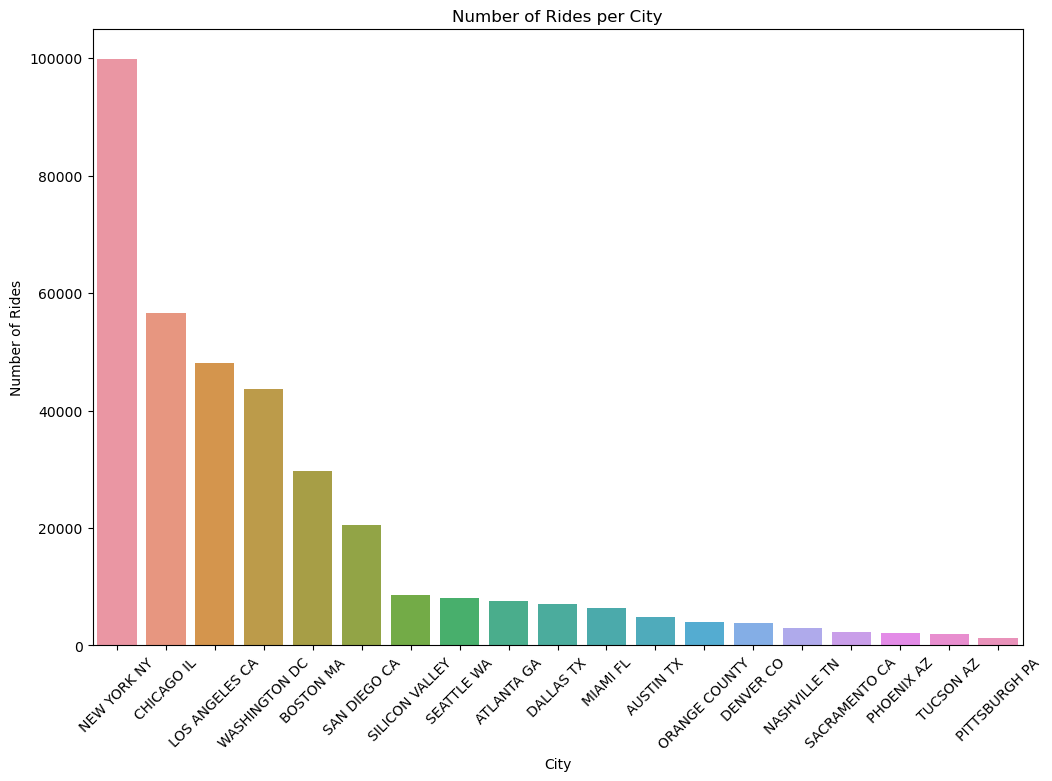

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(x='City', data=df, order=df['City'].value_counts().index)
plt.title('Number of Rides per City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

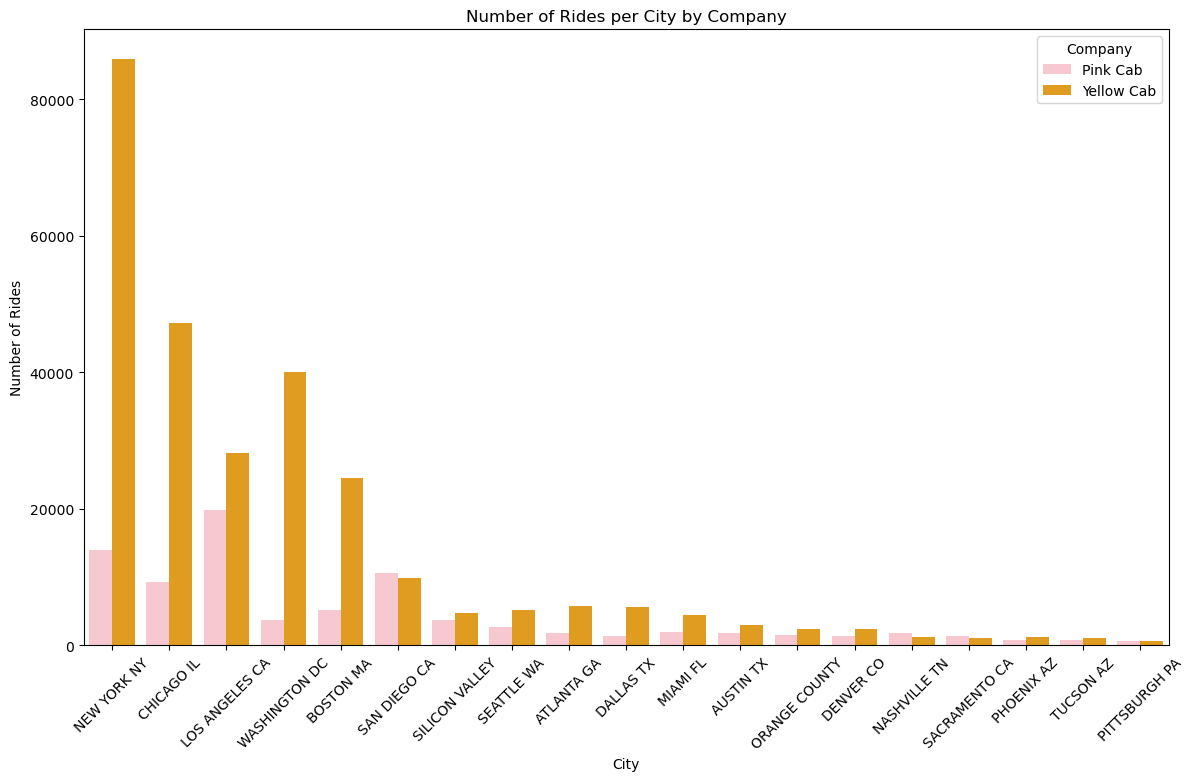

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color mapping for consistency
color_mapping = {'Pink Cab': 'pink', 'Yellow Cab': 'orange'}

# Create the plot
plt.figure(figsize=(14, 8))

# Plot with consistent colors
sns.countplot(x='City', hue='Company', data=df, order=df['City'].value_counts().index, palette=color_mapping)

# Customize plot
plt.title('Number of Rides per City by Company')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

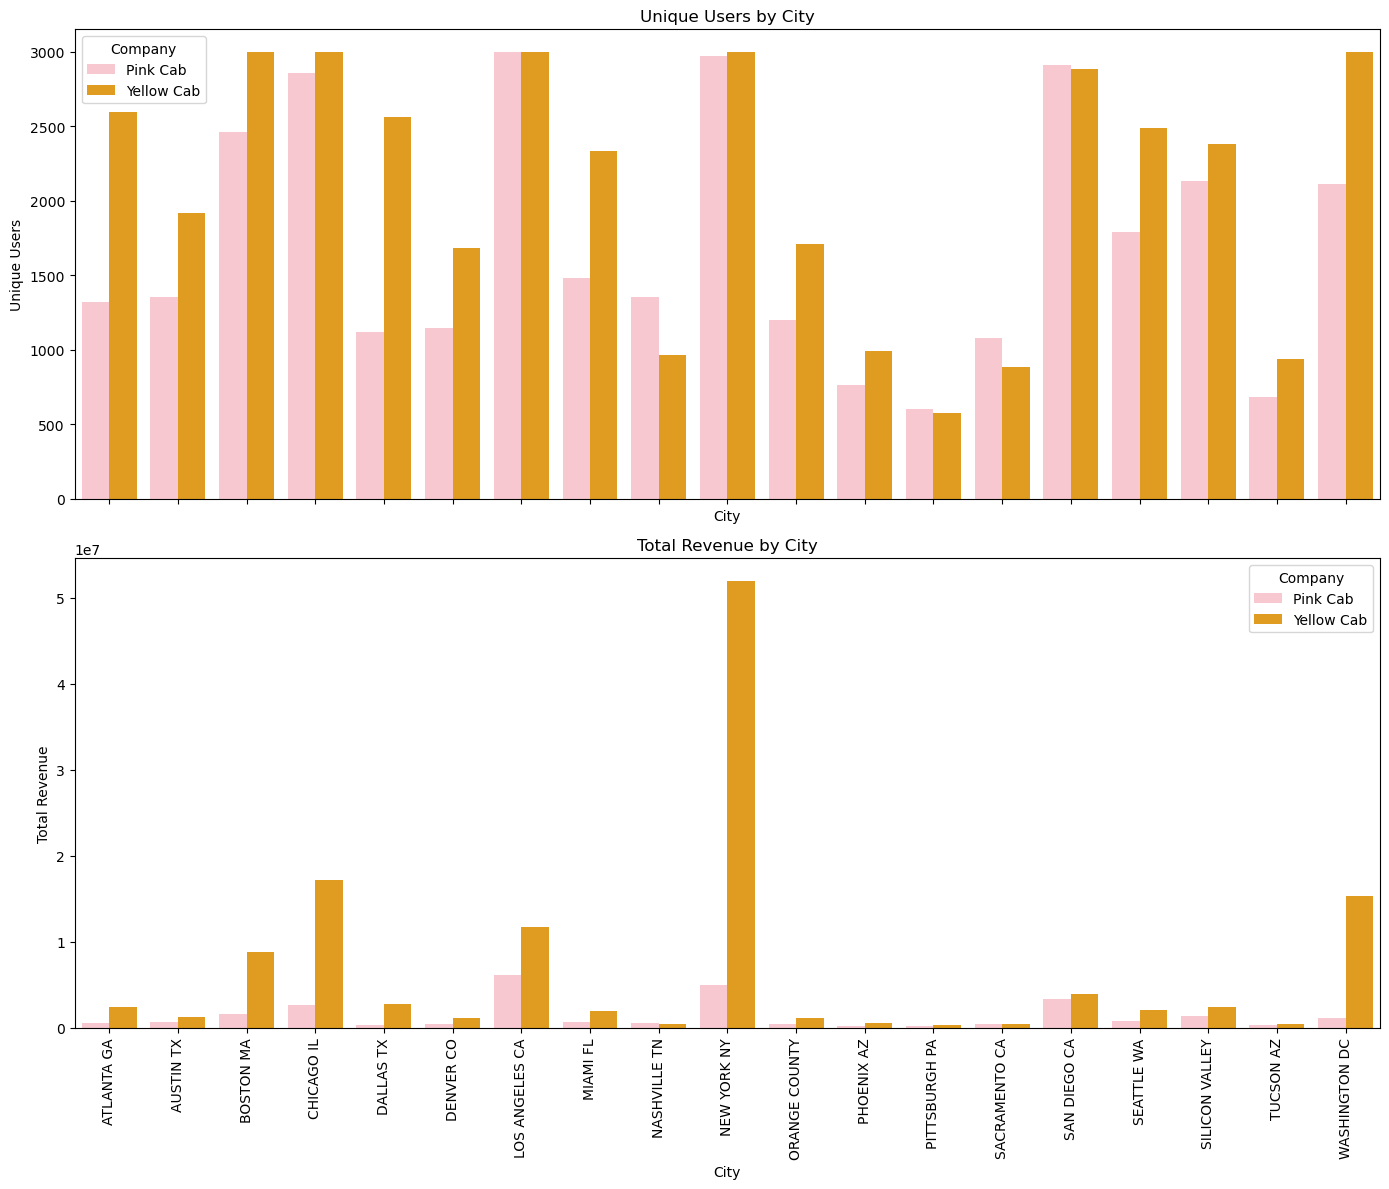

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by City and Company
city_summary = df.groupby(['City', 'Company']).agg({
    'Customer ID': 'nunique',  # Unique users
    'Price Charged': 'sum'     # Total revenue
}).reset_index()

# Rename columns for clarity
city_summary.rename(columns={'Customer ID': 'Unique Users', 'Price Charged': 'Total Revenue'}, inplace=True)

# Create subplots for unique users and revenue
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Bar plot for Unique Users by City
sns.barplot(data=city_summary, x='City', y='Unique Users', hue='Company', palette={'Pink Cab': 'pink', 'Yellow Cab': 'orange'}, ax=ax[0])
ax[0].set_title('Unique Users by City')
ax[0].set_xlabel('City')
ax[0].set_ylabel('Unique Users')
ax[0].tick_params(axis='x', rotation=90)  # Rotate city labels for better readability

# Bar plot for Total Revenue by City
sns.barplot(data=city_summary, x='City', y='Total Revenue', hue='Company', palette={'Pink Cab': 'pink', 'Yellow Cab': 'orange'}, ax=ax[1])
ax[1].set_title('Total Revenue by City')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Total Revenue')
ax[1].tick_params(axis='x', rotation=90)  # Rotate city labels for better readability

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [27]:
# Group by 'Company' and calculate mean 'Profit'
company_summary = df.groupby('Company').agg({
    'Profit': 'mean',
    'Users': 'sum'
}).reset_index()

print(company_summary)

      Company      Profit        Users
0    Pink Cab   62.652174  10638923388
1  Yellow Cab  160.259986  46276399954


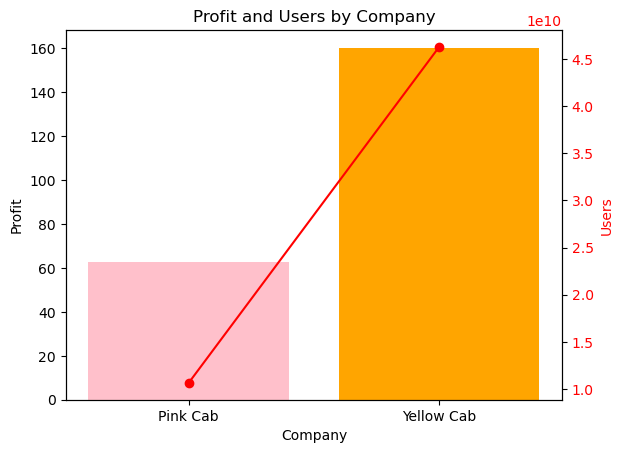

In [28]:
import matplotlib.pyplot as plt

# Define color mapping for bars
color_mapping = {'Pink Cab': 'pink', 'Yellow Cab': 'orange'}

# Plot profit and users for each company
fig, ax1 = plt.subplots()

# Bar chart for profit with specific colors for each company
ax1.set_xlabel('Company')
ax1.set_ylabel('Profit')
bars = ax1.bar(company_summary['Company'], company_summary['Profit'], color=[color_mapping[company] for company in company_summary['Company']])
ax1.tick_params(axis='y')

# Create a second y-axis for users with red color
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Users', color=color)
ax2.plot(company_summary['Company'], company_summary['Users'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Profit and Users by Company')
plt.show()

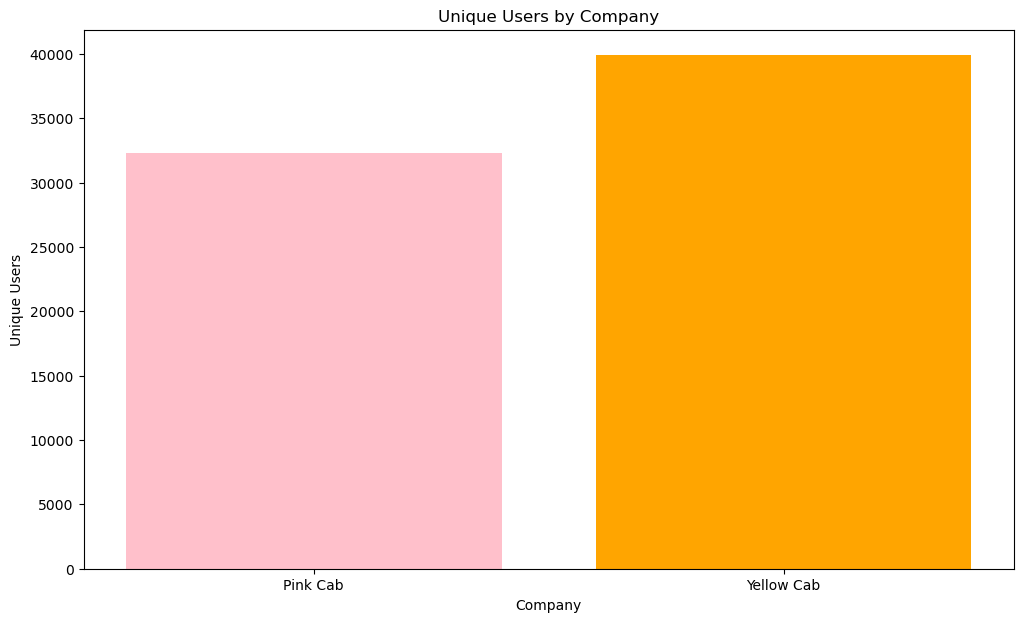

In [29]:
import matplotlib.pyplot as plt

# Define color mapping
color_mapping = {'Pink Cab': 'pink', 'Yellow Cab': 'orange'}

# Calculate unique users per company
unique_users_per_company = df.groupby('Company')['Customer ID'].nunique()

# Plotting unique users by company
plt.figure(figsize=(12, 7))

# Bar plot for unique users with consistent colors
plt.bar(unique_users_per_company.index, unique_users_per_company.values, color=[color_mapping[company] for company in unique_users_per_company.index])

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Unique Users')
plt.title('Unique Users by Company')

plt.xticks(rotation=0)
plt.show()

In [ ]:
Yellow cab has more unique users than pink cab.

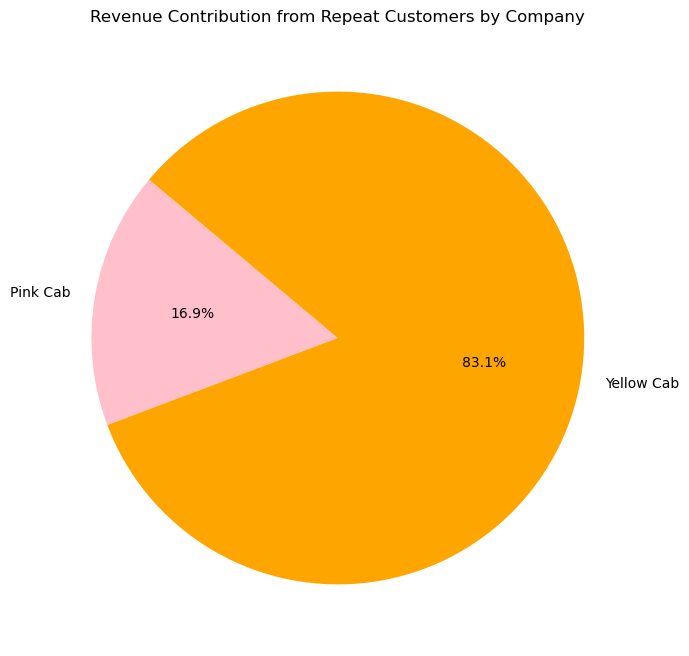

In [30]:
# Assuming repeat customers are identified by having more than one transaction
repeat_customers = df.groupby('Customer ID').filter(lambda x: len(x) > 1)

# Calculate revenue from repeat customers for each company
repeat_revenue = repeat_customers.groupby('Company')['Price Charged'].sum()

# Pie chart with percentages and labels
colors = ['pink', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(repeat_revenue, labels=repeat_revenue.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Revenue Contribution from Repeat Customers by Company')
plt.show()

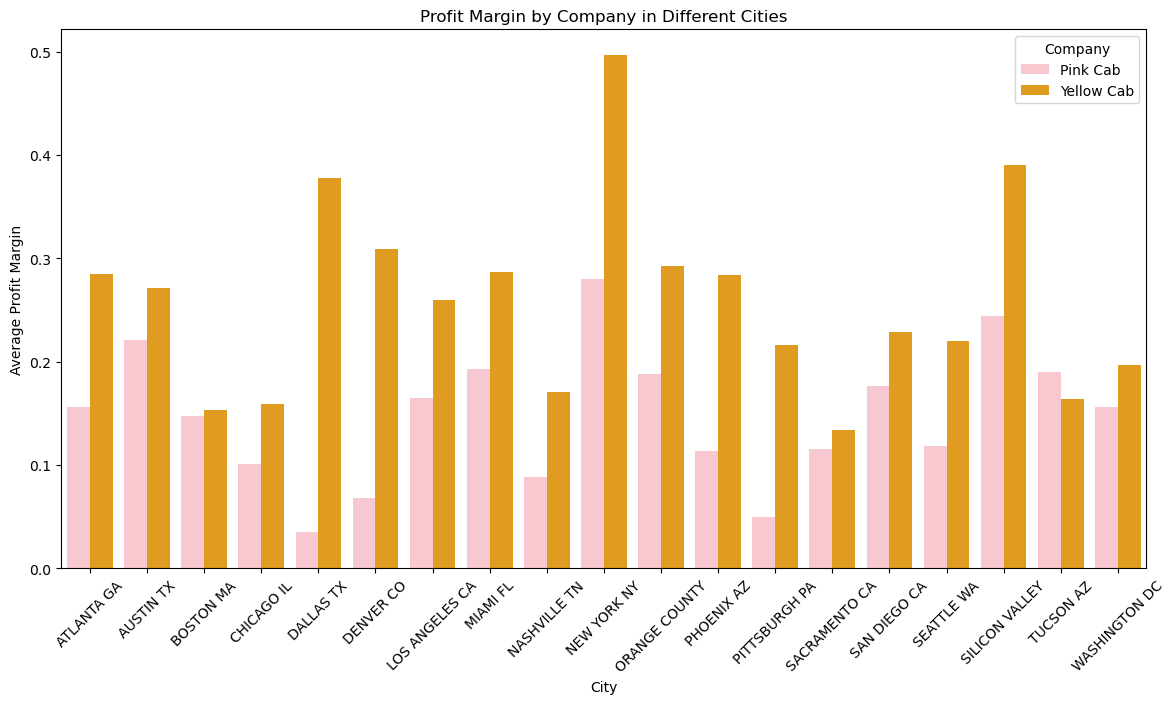

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color mapping
color_mapping = {'Pink Cab': 'pink', 'Yellow Cab': 'orange'}

# Calculating profit margin
df['Profit Margin'] = (df['Price Charged'] - df['Cost of Trip']) / df['Price Charged']

# Aggregating the data by City and Company to find average profit margin
profit_margin = df.groupby(['City', 'Company'])['Profit Margin'].mean().reset_index()

# Plotting the profit margin by company in various cities
plt.figure(figsize=(14, 7))
sns.barplot(x='City', y='Profit Margin', hue='Company', data=profit_margin, palette=color_mapping)
plt.title('Profit Margin by Company in Different Cities')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)
plt.show()

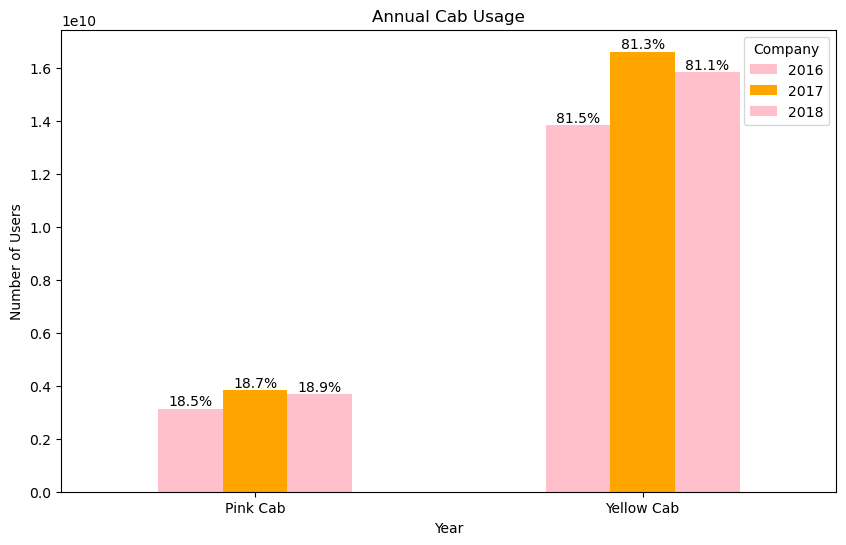

In [32]:
import matplotlib.pyplot as plt

# Aggregate data by year
df['Year'] = df['Year_Month'].dt.year
yearly_data = df.groupby(['Company', 'Year'])['Users'].sum().unstack()

# Plot the data
ax = yearly_data.plot(kind='bar', figsize=(10, 6), color=['pink', 'orange'])
plt.title('Annual Cab Usage')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Company')

# Adding percentage labels to the bars
for container in ax.containers:
    labels = [f'{(v/sum(container.datavalues)*100):.1f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels)

plt.show()

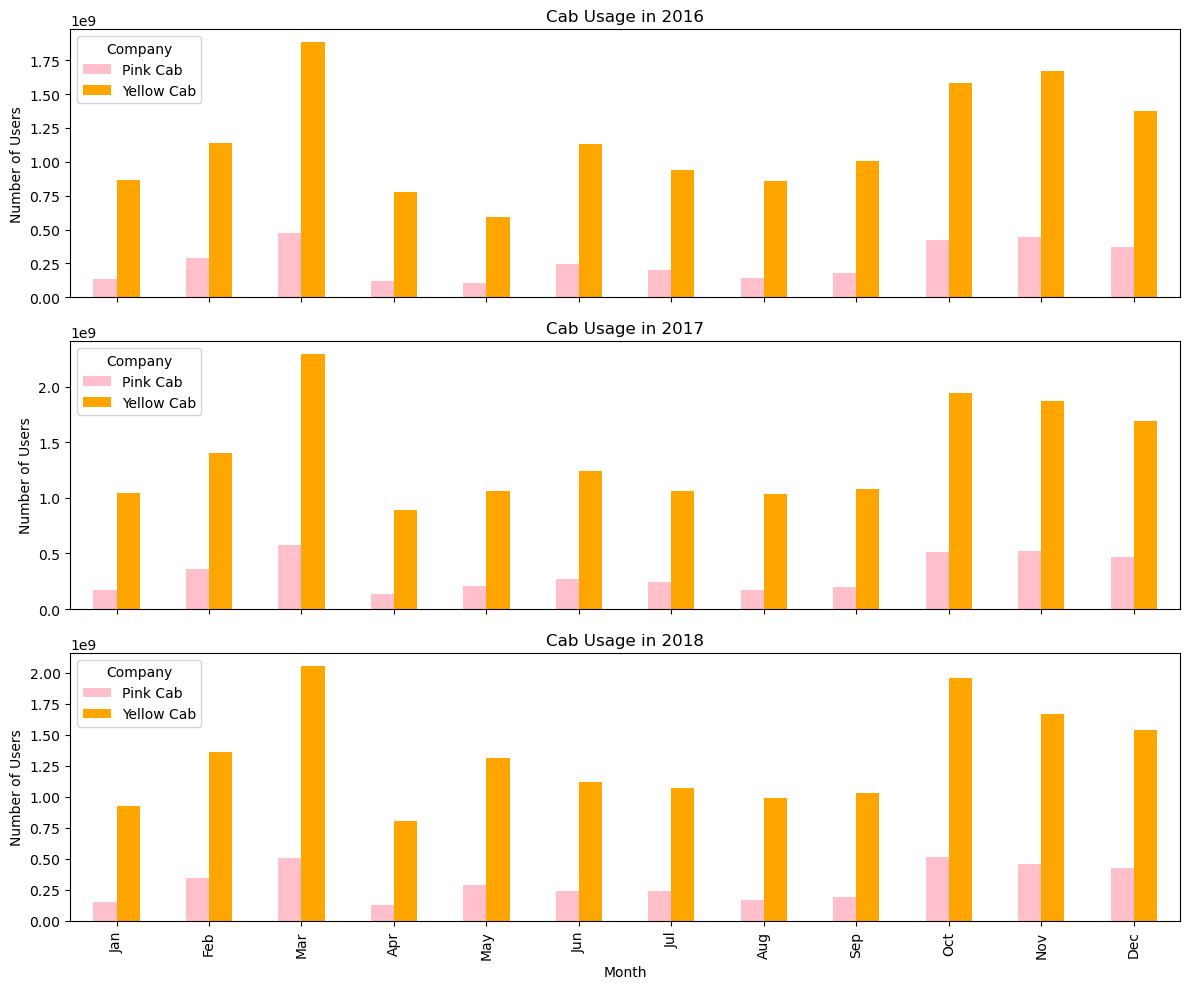

In [35]:
import matplotlib.pyplot as plt

# Group by company, year, and month to get the number of users
seasonal_data = df.groupby(['Company', 'Year', 'Travel Month'])['Users'].sum().reset_index()

# List of unique years
years = seasonal_data['Year'].unique()

# Create subplots for each year
fig, axes = plt.subplots(len(years), 1, figsize=(12, 10), sharex=True)

for i, year in enumerate(years):
    ax = axes[i]
    data = seasonal_data[seasonal_data['Year'] == year].pivot(index='Travel Month', columns='Company', values='Users')
    data.plot(ax=ax, kind='bar', color=['pink', 'orange'])
    ax.set_title(f'Cab Usage in {year}')
    ax.set_ylabel('Number of Users')
    
    # Show x-labels only on the last subplot
    if i < len(years) - 1:
        ax.set_xlabel('')  # Remove x-label for all but the last plot
    else:
        ax.set_xlabel('Month')
        ax.set_xticks(range(12))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Improve layout
plt.tight_layout()
plt.show()

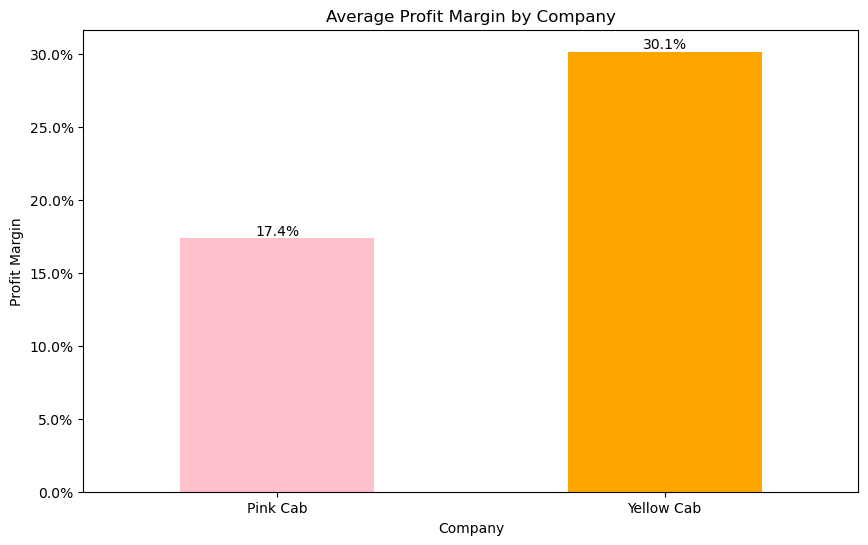

In [47]:
import matplotlib.ticker as mtick

# Calculate profit margin
df['Profit Margin'] = df['Profit'] / df['Price Charged']

# Average profit margin by company
profit_margin_data = df.groupby('Company')['Profit Margin'].mean()

# Bar plot with data labels
ax = profit_margin_data.plot(kind='bar', figsize=(10, 6), color=['pink', 'orange'])
plt.title('Average Profit Margin by Company')
plt.ylabel('Profit Margin')
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v*100:.1f}%' for v in container.datavalues])
plt.show()

C:\Users\egbuz\AppData\Local\Temp\ipykernel_18572\2529339214.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_revenue_data = df.groupby(['Income_Category', 'Company'])['Price Charged'].sum().unstack()


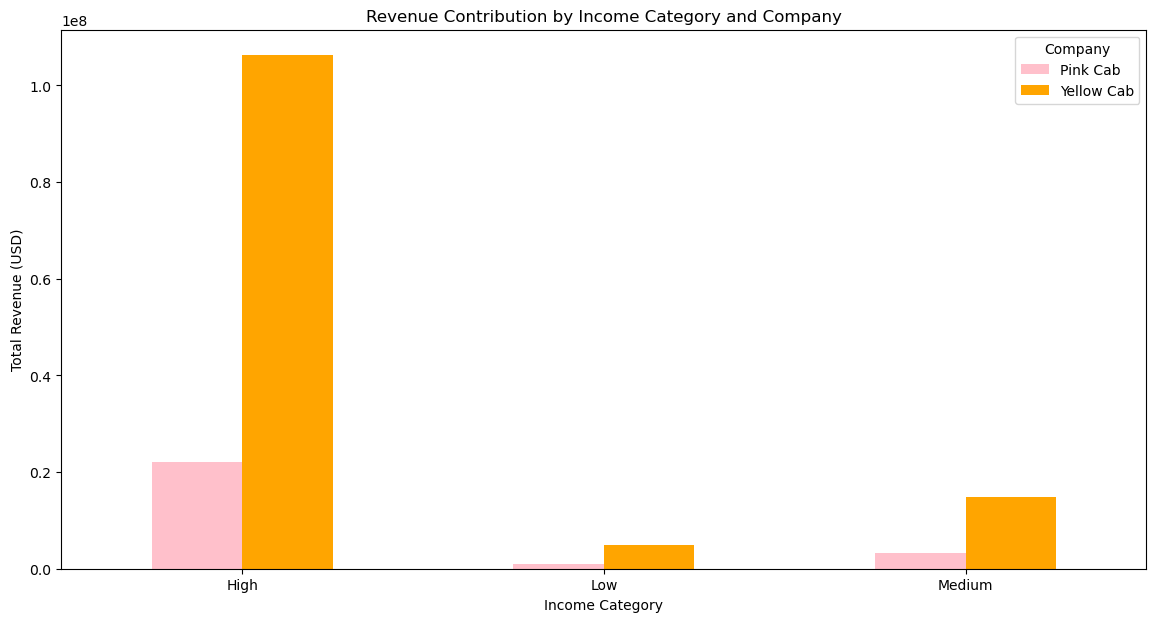

In [50]:
import matplotlib.pyplot as plt

# Group by company and income category to get revenue
income_revenue_data = df.groupby(['Income_Category', 'Company'])['Price Charged'].sum().unstack()

# Bar plot without data labels
ax = income_revenue_data.plot(kind='bar', figsize=(14, 7), color=['pink', 'orange'])
plt.title('Revenue Contribution by Income Category and Company')
plt.xlabel('Income Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=0)

plt.show()

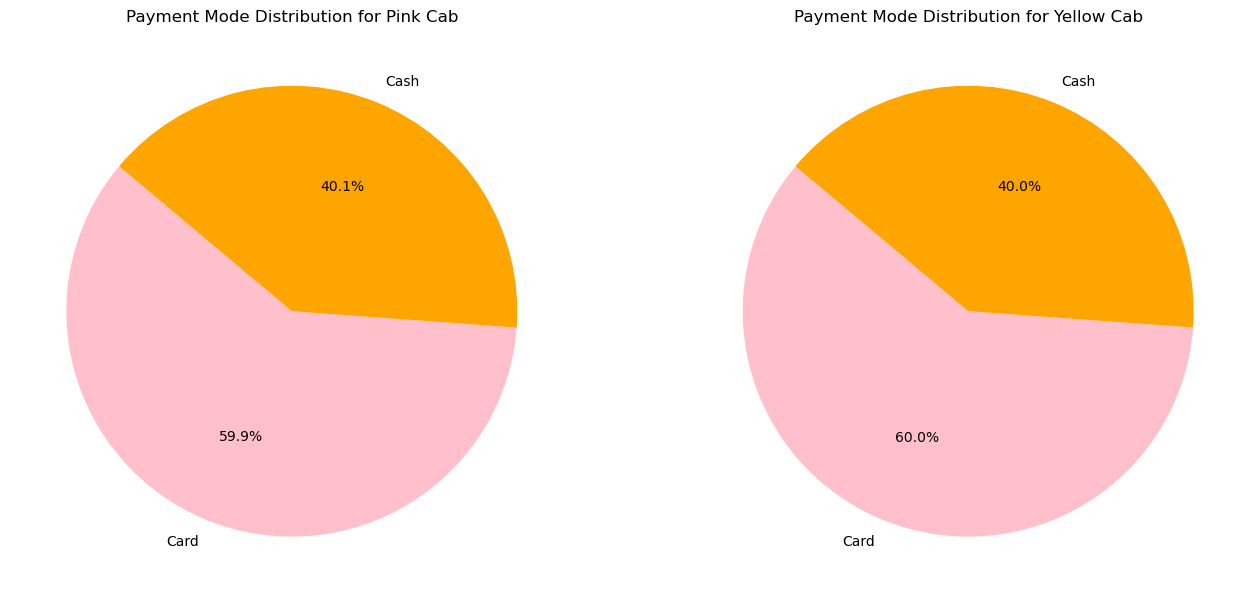

In [38]:
# Group by company and payment mode to get payment counts
payment_mode_data = df.groupby(['Company', 'Payment_Mode'])['Price Charged'].sum().unstack()

# Pie chart for each company
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

colors = ['pink', 'orange']

for i, company in enumerate(payment_mode_data.index):
    axs[i].pie(payment_mode_data.loc[company], labels=payment_mode_data.columns, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Payment Mode Distribution for {company}')

plt.show()

Unique companies in the dataset: ['Pink Cab' 'Yellow Cab']


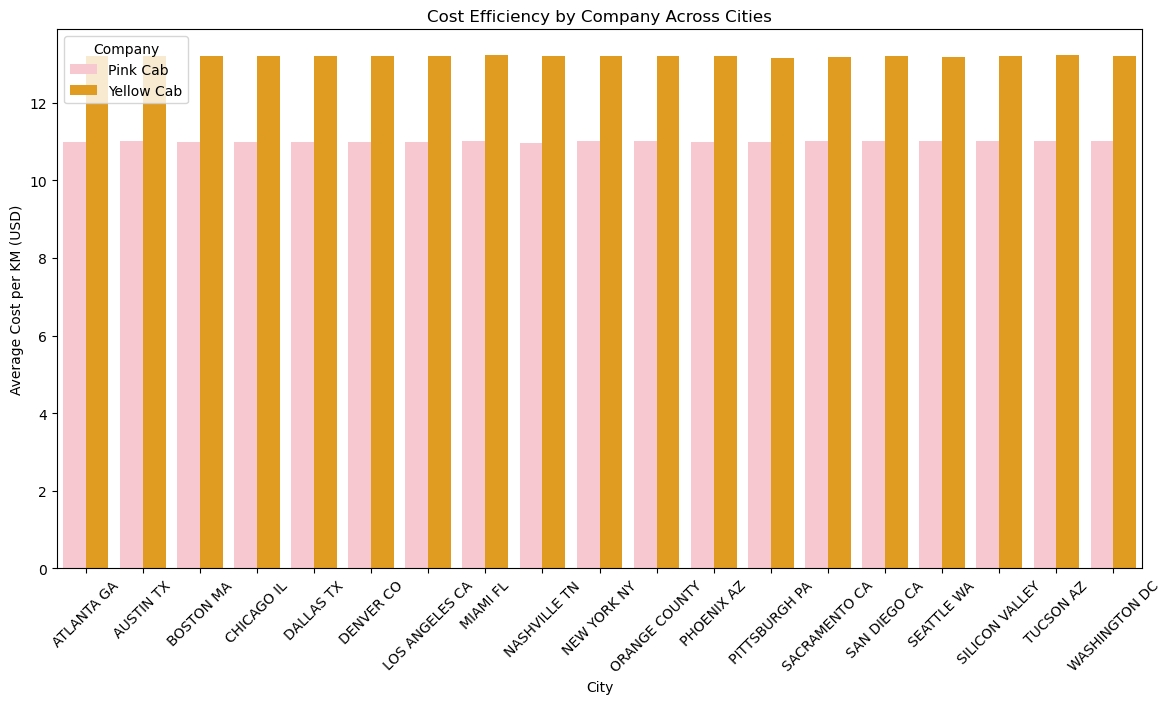

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating cost efficiency as Cost of Trip per KM
df['Cost Efficiency'] = df['Cost of Trip'] / df['KM Travelled']

# Grouping data by City and Company to find average cost efficiency
cost_efficiency = df.groupby(['City', 'Company'])['Cost Efficiency'].mean().reset_index()

# Check unique company names in the dataset
unique_companies = cost_efficiency['Company'].unique()
print(f"Unique companies in the dataset: {unique_companies}")

# Define a color palette for the companies (update based on the unique company names)
palette = {company: color for company, color in zip(unique_companies, ['pink', 'orange'])}

# Plotting the cost efficiency by company across different cities
plt.figure(figsize=(14, 7))
sns.barplot(x='City', y='Cost Efficiency', hue='Company', data=cost_efficiency, palette=palette)
plt.title('Cost Efficiency by Company Across Cities')
plt.ylabel('Average Cost per KM (USD)')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

C:\Users\egbuz\AppData\Local\Temp\ipykernel_18572\3928613749.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_data = df.groupby(['Company', 'Gender'])['Users'].sum().unstack()


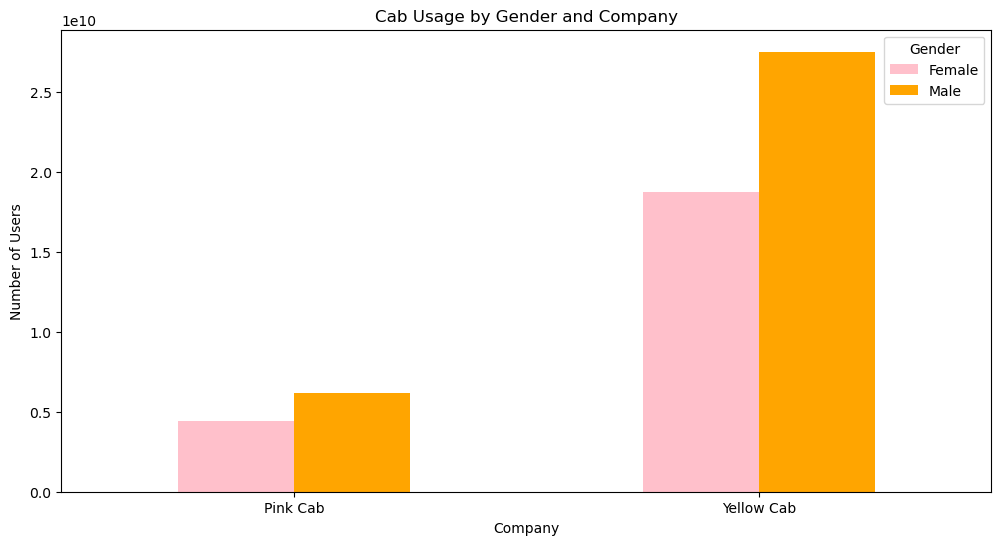

In [49]:
import matplotlib.pyplot as plt

# Group by company and gender to get users count
gender_data = df.groupby(['Company', 'Gender'])['Users'].sum().unstack()

# Bar plot without data labels
ax = gender_data.plot(kind='bar', figsize=(12, 6), color=['pink', 'orange'])
plt.title('Cab Usage by Gender and Company')
plt.xlabel('Company')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)

plt.show()

C:\Users\egbuz\AppData\Local\Temp\ipykernel_18572\3593645383.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_usage_data = df.groupby(['Age_Group', 'Company'])['Users'].sum().unstack()


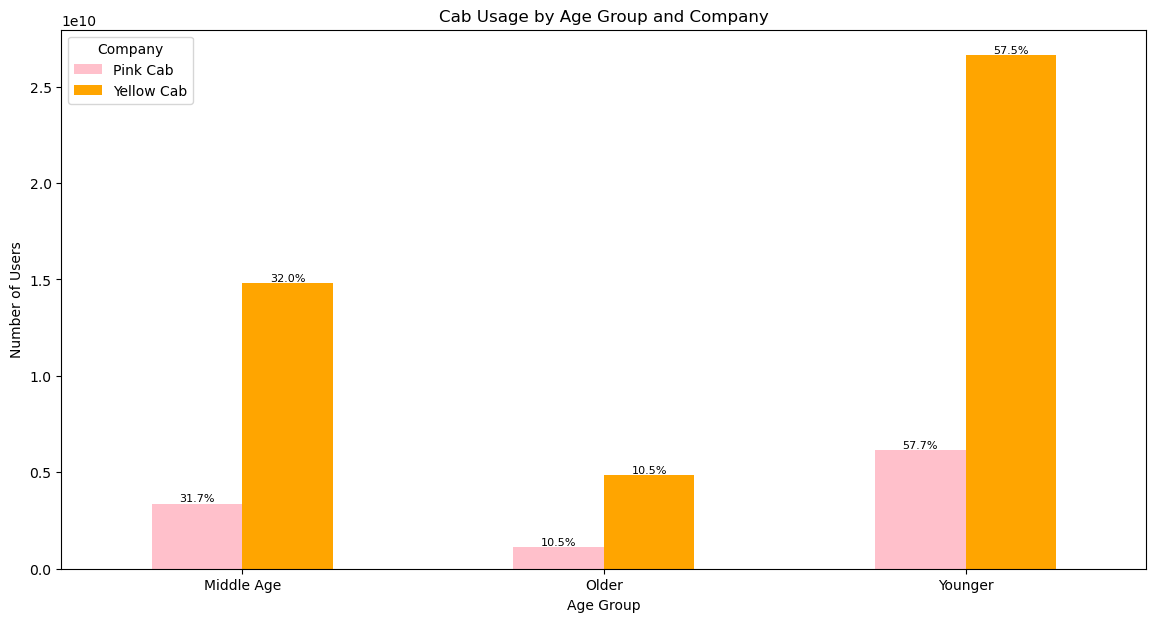

In [41]:
import matplotlib.pyplot as plt

# Calculate total cab usage by age group and company
age_usage_data = df.groupby(['Age_Group', 'Company'])['Users'].sum().unstack()

# Bar plot with percentage labels
ax = age_usage_data.plot(kind='bar', figsize=(14, 7), color=['pink', 'orange'])
plt.title('Cab Usage by Age Group and Company')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)

# Adding percentage labels to each bar
for company in age_usage_data.columns:
    total_users = age_usage_data[company].sum()
    bars = ax.containers[age_usage_data.columns.get_loc(company)]
    labels = [f'{(v / total_users * 100):.1f}%' for v in bars.datavalues]
    ax.bar_label(bars, labels=labels, label_type='edge', fontsize=8)

plt.legend(title='Company')
plt.show()

In [42]:
# Calculate average cost of trips
cost_summary = df.groupby('Company').agg({
    'Cost of Trip': 'mean'
}).reset_index()

print(cost_summary)


      Company  Cost of Trip
0    Pink Cab    248.148682
1  Yellow Cab    297.922004


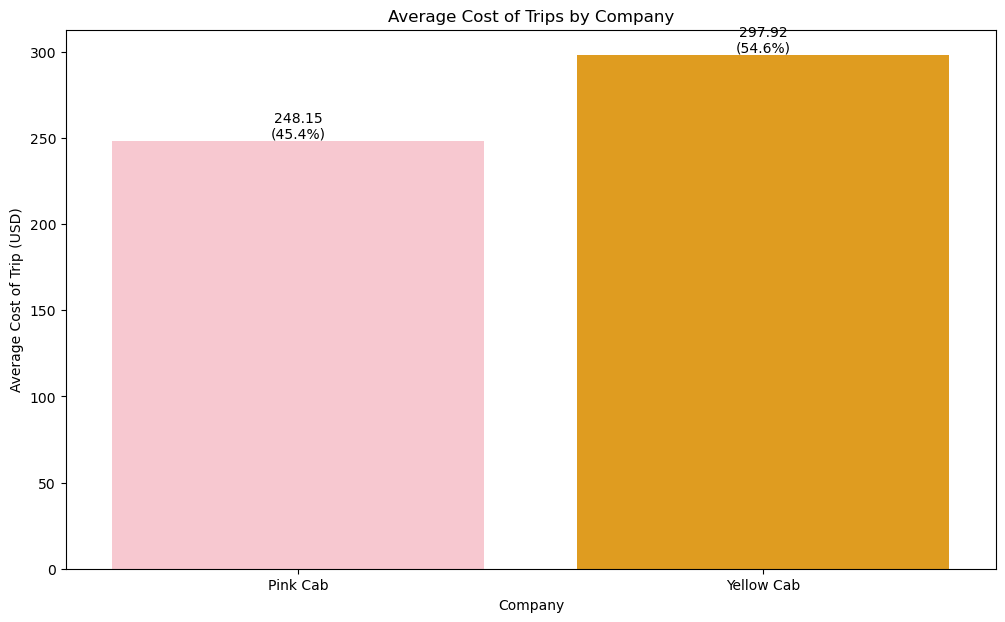

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average cost of trips
cost_summary = df.groupby('Company').agg({
    'Cost of Trip': 'mean'
}).reset_index()

# Calculate the total average cost across all companies
total_avg_cost = cost_summary['Cost of Trip'].sum()

# Calculate percentage for each company's average cost
cost_summary['Percentage'] = (cost_summary['Cost of Trip'] / total_avg_cost) * 100

# Define color mapping
color_mapping = {'Pink Cab': 'pink', 'Yellow Cab': 'orange'}

# Plotting average cost of trips by company
plt.figure(figsize=(12, 7))

# Bar plot for average cost of trips
ax = sns.barplot(x='Company', y='Cost of Trip', data=cost_summary, palette=color_mapping)

# Add percentage labels to bars
for p in ax.patches:
    height = p.get_height()
    percentage = cost_summary[cost_summary['Cost of Trip'] == height]['Percentage'].values[0]
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}\n({percentage:.1f}%)', 
            ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Average Cost of Trip (USD)')
plt.title('Average Cost of Trips by Company')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


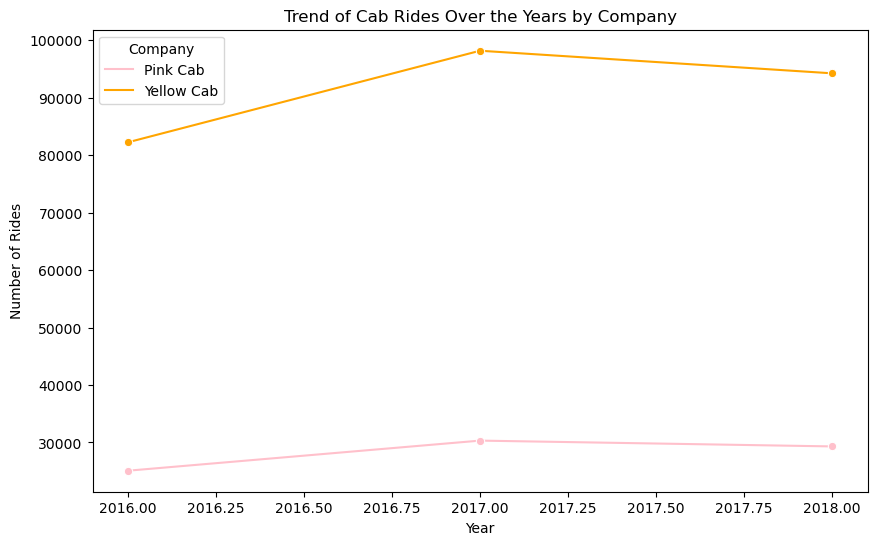

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color mapping for consistency
color_mapping = {'Pink Cab': 'pink', 'Yellow Cab': 'orange'}

# Group the data by Year and Company, and count the number of rides
yearly_data = df.groupby(['Year', 'Company']).size().reset_index(name='Number of Rides')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_data, x='Year', y='Number of Rides', hue='Company', palette=color_mapping, marker='o')

# Customize plot
plt.title('Trend of Cab Rides Over the Years by Company')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.legend(title='Company')
plt.show()

In [51]:
import scipy.stats as stats

# Aggregate the number of users by gender
gender_usage = df.groupby('Gender')['Users'].sum()

# Perform a t-test for independent samples
# Note: We need two arrays of user counts to perform this test
male_users = df[df['Gender'] == 'Male']['Users']
female_users = df[df['Gender'] == 'Female']['Users']

t_stat, p_value = stats.ttest_ind(male_users, female_users, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in cab usage between males and females.")
else:
    print("There is no significant difference in cab usage between males and females.")

C:\Users\egbuz\AppData\Local\Temp\ipykernel_18572\854714045.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_usage = df.groupby('Gender')['Users'].sum()


T-statistic: 36.522236572546824
P-value: 1.8983851995043967e-291
There is a significant difference in cab usage between males and females.


In [52]:
# Aggregate profit margins by company
profit_margin_by_company = df.groupby('Company')['Profit'].mean()

# Perform a t-test for independent samples
yellow_cab_profit = df[df['Company'] == 'Yellow Cab']['Profit']
pink_cab_profit = df[df['Company'] == 'Pink Cab']['Profit']

t_stat, p_value = stats.ttest_ind(yellow_cab_profit, pink_cab_profit, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Yellow Cab has a significantly higher average profit margin compared to Pink Cab.")
else:
    print("There is no significant difference in average profit margins between Yellow Cab and Pink Cab.")

T-statistic: 230.99551452746311
P-value: 0.0
Yellow Cab has a significantly higher average profit margin compared to Pink Cab.


In [67]:
import pandas as pd
from scipy import stats

# Filter and prepare data
yellow_cab_high = df[(df['Company'] == 'Yellow Cab') & (df['Income_Category'] == 'High')]['Price Charged']
yellow_cab_low = df[(df['Company'] == 'Yellow Cab') & (df['Income_Category'] == 'Low')]['Price Charged']
pink_cab_high = df[(df['Company'] == 'Pink Cab') & (df['Income_Category'] == 'High')]['Price Charged']
pink_cab_low = df[(df['Company'] == 'Pink Cab') & (df['Income_Category'] == 'Low')]['Price Charged']

# Combine data into a single DataFrame for analysis
combined_data = pd.DataFrame({
    'Company': ['Yellow Cab'] * len(yellow_cab_high) + ['Yellow Cab'] * len(yellow_cab_low) +
                ['Pink Cab'] * len(pink_cab_high) + ['Pink Cab'] * len(pink_cab_low),
    'Income_Category': ['High'] * len(yellow_cab_high) + ['Low'] * len(yellow_cab_low) +
                       ['High'] * len(pink_cab_high) + ['Low'] * len(pink_cab_low),
    'Price Charged': list(yellow_cab_high) + list(yellow_cab_low) + list(pink_cab_high) + list(pink_cab_low)
})

# Perform Kruskal-Wallis H-test
h_stat, p_value = stats.kruskal(
    combined_data[(combined_data['Company'] == 'Yellow Cab') & (combined_data['Income_Category'] == 'High')]['Price Charged'],
    combined_data[(combined_data['Company'] == 'Yellow Cab') & (combined_data['Income_Category'] == 'Low')]['Price Charged'],
    combined_data[(combined_data['Company'] == 'Pink Cab') & (combined_data['Income_Category'] == 'High')]['Price Charged'],
    combined_data[(combined_data['Company'] == 'Pink Cab') & (combined_data['Income_Category'] == 'Low')]['Price Charged']
)

print(f"H-statistic: {h_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in revenue generation between high-income and low-income earners across both companies.")
else:
    print("There is no significant difference in revenue generation between high-income and low-income earners across both companies.")

H-statistic: 14917.81734623754
P-value: 0.0
There is a significant difference in revenue generation between high-income and low-income earners across both companies.


In [55]:
# Aggregate average trip cost by company
avg_trip_cost_by_company = df.groupby('Company')['Cost of Trip'].mean()

# Perform a t-test for average trip cost
yellow_cab_cost = df[df['Company'] == 'Yellow Cab']['Cost of Trip']
pink_cab_cost = df[df['Company'] == 'Pink Cab']['Cost of Trip']

t_stat, p_value = stats.ttest_ind(yellow_cab_cost, pink_cab_cost, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The average trip cost is significantly higher for Yellow Cab compared to Pink Cab.")
else:
    print("There is no significant difference in average trip costs between Yellow Cab and Pink Cab.")

T-statistic: 89.01971247300362
P-value: 0.0
The average trip cost is significantly higher for Yellow Cab compared to Pink Cab.


In [58]:
# Aggregate number of users by age group
age_group_usage = df.groupby('Age_Group')['Users'].sum()

# Perform Chi-Square test for uniform distribution
observed = age_group_usage.values
expected = [sum(observed) / len(observed)] * len(observed)

chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The distribution of cab usage across different age groups is not uniform.")
else:
    print("The distribution of cab usage across different age groups is uniform.")

Chi-Square Statistic: 18950752960.84848
P-value: 0.0
The distribution of cab usage across different age groups is not uniform.


C:\Users\egbuz\AppData\Local\Temp\ipykernel_18572\3613374214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_usage = df.groupby('Age_Group')['Users'].sum()


In [61]:
# Aggregate number of rides by payment mode
payment_mode_usage = df.groupby('Payment_Mode')['Users'].sum()

# Perform a t-test to compare two payment modes
card_usage = df[df['Payment_Mode'] == 'Card']['Users']
cash_usage = df[df['Payment_Mode'] == 'Cash']['Users']

t_stat, p_value = stats.ttest_ind(card_usage, cash_usage, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in cab usage between different payment modes.")
else:
    print("There is no significant difference in cab usage between different payment modes.")

T-statistic: -1.0242536163472624
P-value: 0.30571630387777504
There is no significant difference in cab usage between different payment modes.


In [63]:
# Define large metropolitan and smaller cities based on population
large_cities = df[df['Population'] >  df['Population'].median()]['City']
small_cities = df[df['Population'] <= df['Population'].median()]['City']

# Filter data by city size
large_city_data = df[df['City'].isin(large_cities)]
small_city_data = df[df['City'].isin(small_cities)]

# Calculate average revenue per ride by city size
avg_revenue_large = large_city_data['Price Charged'].sum() / large_city_data['Users'].sum()
avg_revenue_small = small_city_data['Price Charged'].sum() / small_city_data['Users'].sum()

# Perform a t-test for average revenue per ride
t_stat, p_value = stats.ttest_ind(large_city_data['Price Charged'], small_city_data['Price Charged'], equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The average revenue generated per ride is significantly higher in large metropolitan areas compared to smaller cities.")
else:
    print("There is no significant difference in average revenue generated per ride between large metropolitan areas and smaller cities.")

T-statistic: 126.47873145242187
P-value: 0.0
The average revenue generated per ride is significantly higher in large metropolitan areas compared to smaller cities.
